# Imports

In [550]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [551]:
df = pd.read_csv('Datasets/OnlineRetail.csv', encoding='ISO-8859-1')

In [552]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [553]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [554]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# Countrty names

In [555]:
country_names = df['Country'].unique()
country_names

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

### Notices 

- Unspecified countries 
- European Community 
- RSA 
- EIRE

In [556]:
Quantity_check = df[df['Quantity'] < 0]
Quantity_check

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,01-12-2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01-12-2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01-12-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,09-12-2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,09-12-2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,09-12-2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,09-12-2011 11:58,1.25,17315.0,United Kingdom


# Negative quantities

In [557]:
UnitPrice_check = df[df['UnitPrice'] < 0]
UnitPrice_check

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,12-08-2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,12-08-2011 14:52,-11062.06,NaN,United Kingdom


### Negative prices

# Customer ID cleaning

In [558]:
CustomerID_check = df[df['CustomerID'].isnull()]
CustomerID_check

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,01-12-2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,01-12-2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,01-12-2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,01-12-2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,01-12-2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,09-12-2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,09-12-2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,09-12-2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,09-12-2011 10:26,10.79,NaN,United Kingdom


In [559]:
df = df.dropna(subset=['CustomerID'])

In [560]:
CustomerID_check = df[df['CustomerID'].isnull()]
CustomerID_check

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [561]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


# Stock code

In [562]:
stock_code = df['StockCode'].unique()
stock_code.sort
# for i in stock_code:
#     print(i)

<function ndarray.sort>

In [563]:
negative_stock_code = df[df['StockCode'].str.contains('-')]
negative_stock_code

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [564]:
longest_code = df['StockCode'].str.len().max()
longest_code

np.int64(12)

In [565]:
longest_code_stock = df[df['StockCode'].str.len() >= longest_code]
longest_code_stock

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4406,536779,BANK CHARGES,Bank Charges,1,02-12-2010 15:08,15.000,15823.0,United Kingdom
62508,541505,BANK CHARGES,Bank Charges,1,18-01-2011 15:58,15.000,15939.0,United Kingdom
152966,549717,BANK CHARGES,Bank Charges,1,11-04-2011 14:56,15.000,14606.0,United Kingdom
175275,551945,BANK CHARGES,Bank Charges,1,05-05-2011 11:09,15.000,16714.0,United Kingdom
327921,565735,BANK CHARGES,Bank Charges,1,06-09-2011 12:25,15.000,16904.0,United Kingdom
361740,568375,BANK CHARGES,Bank Charges,1,26-09-2011 17:01,15.000,13405.0,United Kingdom
361741,568375,BANK CHARGES,Bank Charges,1,26-09-2011 17:01,0.001,13405.0,United Kingdom
407618,571900,BANK CHARGES,Bank Charges,1,19-10-2011 14:26,15.000,13263.0,United Kingdom
431351,573586,BANK CHARGES,Bank Charges,1,31-10-2011 14:48,15.000,14704.0,United Kingdom
440745,574546,BANK CHARGES,Bank Charges,1,04-11-2011 14:59,15.000,13651.0,United Kingdom


In [566]:
Code_Description = df[['StockCode', 'Description']]
Code_Description.__len__()

406829

In [567]:
Unique_Code_Description = Code_Description.drop_duplicates()
Unique_Code_Description.__len__()

3916

In [568]:
Unique_Code_Description

,StockCode,Description
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,71053,WHITE METAL LANTERN
2,84406B,CREAM CUPID HEARTS COAT HANGER
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,84029E,RED WOOLLY HOTTIE WHITE HEART.
...,...,...
527067,90214W,"LETTER ""W"" BLING KEY RING"
527069,90214Z,"LETTER ""Z"" BLING KEY RING"
530382,90089,PINK CRYSTAL SKULL PHONE CHARM
537621,85123A,CREAM HANGING HEART T-LIGHT HOLDER


In [569]:
Nans = Unique_Code_Description[Unique_Code_Description['Description'].isnull()]
Nans

,StockCode,Description


In [570]:
bank_charges = Unique_Code_Description[Unique_Code_Description['StockCode'].str.contains('BANK CHARGES')]
bank_charges

,StockCode,Description
4406,BANK CHARGES,Bank Charges


In [571]:
Single_Letter = Unique_Code_Description[Unique_Code_Description['StockCode'].str.len() == 1]
Single_Letter

,StockCode,Description
141,D,Discount
2239,M,Manual


In [572]:
Double_Letter = Unique_Code_Description[Unique_Code_Description['StockCode'].str.len() == 2]
Double_Letter

,StockCode,Description
1423,C2,CARRIAGE


In [573]:
Triple_Letter = Unique_Code_Description[Unique_Code_Description['StockCode'].str.len() == 3]
Triple_Letter

,StockCode,Description
317507,DOT,DOTCOM POSTAGE


In [574]:
four_letter = Unique_Code_Description[Unique_Code_Description['StockCode'].str.len() == 4]
four_letter

,StockCode,Description
45,POST,POSTAGE
157195,PADS,PADS TO MATCH ALL CUSHIONS
317508,CRUK,CRUK Commission


In [575]:
five_letter = Unique_Code_Description[Unique_Code_Description['StockCode'].str.len() == 5]
five_letter

,StockCode,Description
1,71053,WHITE METAL LANTERN
5,22752,SET 7 BABUSHKA NESTING BOXES
6,21730,GLASS STAR FROSTED T-LIGHT HOLDER
7,22633,HAND WARMER UNION JACK
8,22632,HAND WARMER RED POLKA DOT
...,...,...
503602,23562,SET OF 6 RIBBONS PERFECTLY PRETTY
503722,21175,GIN AND TONIC DIET METAL SIGN
504104,23561,SET OF 6 RIBBONS PARTY
530382,90089,PINK CRYSTAL SKULL PHONE CHARM


In [576]:
six_letter = Unique_Code_Description[Unique_Code_Description['StockCode'].str.len() == 6]
six_letter

,StockCode,Description
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER
2,84406B,CREAM CUPID HEARTS COAT HANGER
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,84029E,RED WOOLLY HOTTIE WHITE HEART.
60,82494L,WOODEN FRAME ANTIQUE WHITE
...,...,...
527064,90214T,"LETTER ""T"" BLING KEY RING"
527065,90214U,"LETTER ""U"" BLING KEY RING"
527067,90214W,"LETTER ""W"" BLING KEY RING"
527069,90214Z,"LETTER ""Z"" BLING KEY RING"


In [577]:
Stock_Code_Description = pd.concat([Single_Letter,Double_Letter, Triple_Letter, four_letter, bank_charges])
Stock_Code_Description

,StockCode,Description
141,D,Discount
2239,M,Manual
1423,C2,CARRIAGE
317507,DOT,DOTCOM POSTAGE
45,POST,POSTAGE
157195,PADS,PADS TO MATCH ALL CUSHIONS
317508,CRUK,CRUK Commission
4406,BANK CHARGES,Bank Charges


In [578]:
Number_with_letter = Unique_Code_Description[Unique_Code_Description['StockCode'].str.contains('[C]')]
Number_with_letter

,StockCode,Description
87,85099C,JUMBO BAG BAROQUE BLACK WHITE
91,84997C,BLUE 3 PIECE POLKADOT CUTLERY SET
121,37444C,PINK BREAKFAST CUP AND SAUCER
154,35004C,SET OF 3 COLOURED FLYING DUCKS
373,84625C,BLUE NEW BAROQUE CANDLESTICK CANDLE
...,...,...
317508,CRUK,CRUK Commission
328545,90019C,SILVER BLACK ORBIT BRACELET
357492,90182C,BLACK 3 BEAD DROP EARRINGS
464101,35598C,WHITE CHRISTMAS TREE 60CM


In [579]:
Number_with_letter = Unique_Code_Description[Unique_Code_Description['StockCode'].str.contains('[L]')]
Number_with_letter

,StockCode,Description
60,82494L,WOODEN FRAME ANTIQUE WHITE
132,15056BL,EDWARDIAN PARASOL BLACK
450,84970L,SINGLE HEART ZINC T-LIGHT HOLDER
1375,85199L,LARGE HANGING IVORY & RED WOOD BIRD
2105,51014L,"FEATHER PEN,LIGHT PINK"
9684,84596L,BISCUITS SMALL BOWL LIGHT BLUE
10110,85027L,FRENCH CHATEAU LARGE PLATTER
19729,84247L,FAWN AND MUSHROOM GREETING CARD
29801,85194L,HANGING SPRING FLOWER EGG LARGE
37555,84800L,LARGE WHITE/PINK ROSE ART FLOWER


In [580]:
singleitem = df[df['StockCode'].str.contains('90214')]
singleitem

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2423,536591,90214M,"LETTER ""M"" BLING KEY RING",1,01-12-2010 16:57,1.25,14606.0,United Kingdom
2424,536591,90214V,"LETTER ""V"" BLING KEY RING",1,01-12-2010 16:57,1.25,14606.0,United Kingdom
2425,536591,90214S,"LETTER ""S"" BLING KEY RING",1,01-12-2010 16:57,1.25,14606.0,United Kingdom
2426,536591,90214J,"LETTER ""J"" BLING KEY RING",2,01-12-2010 16:57,1.25,14606.0,United Kingdom
17499,537765,90214S,"LETTER ""S"" BLING KEY RING",2,08-12-2010 12:08,1.25,14606.0,United Kingdom
...,...,...,...,...,...,...,...,...
538357,581405,90214I,"LETTER ""I"" BLING KEY RING",1,08-12-2011 13:50,0.29,13521.0,United Kingdom
538792,581414,90214R,"LETTER ""R"" BLING KEY RING",1,08-12-2011 14:39,0.29,14730.0,United Kingdom
538996,581425,90214K,"LETTER ""K"" BLING KEY RING",1,08-12-2011 15:31,0.29,14796.0,United Kingdom
538997,581425,90214N,"LETTER ""N"" BLING KEY RING",1,08-12-2011 15:31,0.29,14796.0,United Kingdom


In [581]:
singleitem = df[df['StockCode'].str.contains('84596')]
singleitem

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1013,536520,84596E,SMALL LICORICE DES PINK BOWL,1,01-12-2010 12:43,1.25,14729.0,United Kingdom
8108,537126,84596E,SMALL LICORICE DES PINK BOWL,1,05-12-2010 12:13,1.25,18118.0,United Kingdom
8109,537126,84596G,SMALL CHOCOLATES PINK BOWL,1,05-12-2010 12:13,1.25,18118.0,United Kingdom
8719,537144,84596E,SMALL LICORICE DES PINK BOWL,1,05-12-2010 13:00,1.25,15880.0,United Kingdom
8720,537144,84596G,SMALL CHOCOLATES PINK BOWL,1,05-12-2010 13:00,1.25,15880.0,United Kingdom
...,...,...,...,...,...,...,...,...
538956,581425,84596G,SMALL CHOCOLATES PINK BOWL,8,08-12-2011 15:31,0.42,14796.0,United Kingdom
538957,581425,84596F,SMALL MARSHMALLOWS PINK BOWL,8,08-12-2011 15:31,0.42,14796.0,United Kingdom
538958,581425,84596B,SMALL DOLLY MIX DESIGN ORANGE BOWL,8,08-12-2011 15:31,0.42,14796.0,United Kingdom
540344,581476,84596F,SMALL MARSHMALLOWS PINK BOWL,32,09-12-2011 08:48,0.42,12433.0,Norway


# Invoice Number 

In [582]:
negative_invoice = df[df['InvoiceNo'].str.contains('-')]
negative_invoice

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [583]:
longest_invoice = df['InvoiceNo'].str.len().max()
longest_invoice

np.int64(7)

In [584]:
df.__len__()

406829

In [585]:
standard_invoice = df[df['InvoiceNo'].str.len() >= longest_invoice]
standard_invoice

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,01-12-2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01-12-2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01-12-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,09-12-2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,09-12-2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,09-12-2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,09-12-2011 11:58,1.25,17315.0,United Kingdom


In [589]:
df_total = df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
top_buyers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False)
top_buyers

KeyError: 'Column not found: TotalPrice'

In [586]:
CustomerID = df[df['CustomerID']< 10000]
CustomerID

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


## density plot

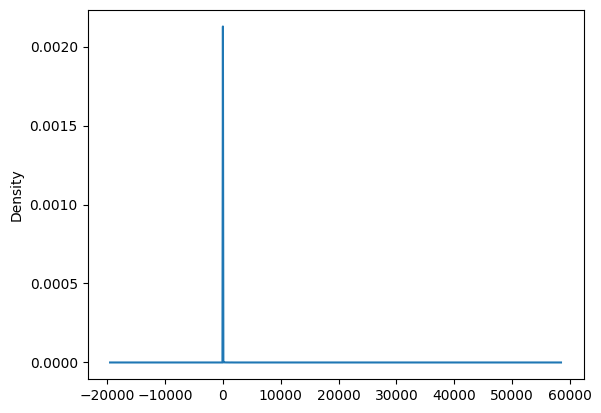

In [587]:
density_plot = df['UnitPrice'].plot(kind='density')
plt.show()


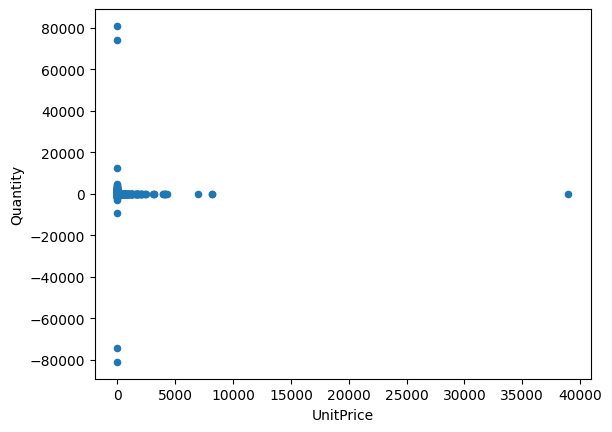

In [588]:
scatter = df.plot(kind='scatter', x='UnitPrice', y='Quantity')
plt.show()